In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Load the preprocessed data
data = pd.read_json(r'C:\Users\paolo\OneDrive\Documents\GitHub\CMSC-197-Miniproject\data\amazon_data.json')

In [21]:
# Split the data into features and labels
X = data['Review_Text']
y = data['Label']

In [ ]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [25]:
# Split the data into training (10%) and evaluation (90%) sets
X_train, X_eval, y_train, y_eval = train_test_split(X_tfidf, y, test_size=0.9, random_state=42)

In [28]:
# View sizes of the training and evaluation sets
print("x_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", X_eval.shape)
print("y_test size:", y_eval.shape)

x_train size: (2100, 35867)
y_train size: (2100,)

x_test size: (18900, 35867)
y_test size: (18900,)


In [ ]:
# train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# evalutate
y_pred = model.predict(X_eval)
accuracy = accuracy_score(y_eval, y_pred)
report = classification_report(y_eval, y_pred)

In [15]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6281481481481481
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      9443
           1       0.62      0.64      0.63      9457

    accuracy                           0.63     18900
   macro avg       0.63      0.63      0.63     18900
weighted avg       0.63      0.63      0.63     18900



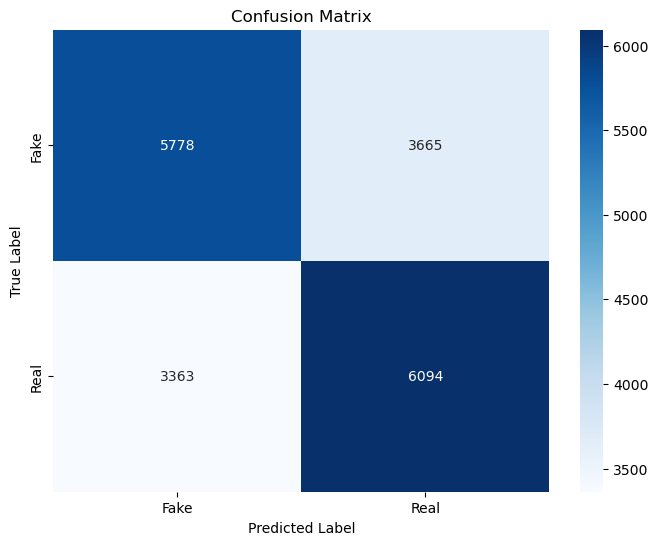

In [33]:
# cnfusion matrix
conf_matrix = confusion_matrix(y_eval, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()